# Edge Detection 
This notebook implements edge detection from Coursera Deep learning course

In [77]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

Make Simple image with vertical edge 

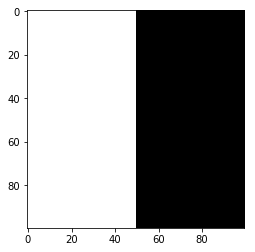

In [115]:
w = 100
h = 100
img1 = np.zeros(shape=(w, h))
img1[:, :int(h/2)] = 255
plt.imshow(img1, cmap="gray")
plt.show()

Simple Vertical Edge Detection using convolution

In [116]:
# Convert img array into shape of (1, w, h, 1) 
# s.t. tensorflow can handle it. 
img1 = img1.reshape((1, w, h, 1))

# define 3x3 filter  
kernel_arr = np.array([[3, 0, -3]]*3, dtype="float32")
kernel_arr = kernel_arr.reshape(3, 3, 1, 1)

#Run convolution on the image array with the filter 
img_input = tf.placeholder(dtype=tf.float32, shape=(1, w, h, 1))
kernel = tf.constant(value=kernel_arr)
edge_detected = tf.nn.conv2d(input=img_input, filter=kernel, strides=(1, 1, 1, 1), padding="VALID")
with tf.Session() as sess:
    detected = sess.run(edge_detected, feed_dict={img_input: img1})
    detected = detected/detected.max()*255
    detected = detected[0, :, :, 0]

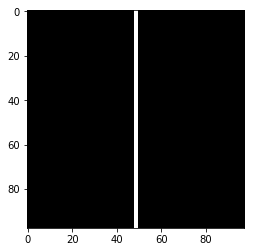

In [117]:
plt.imshow(detected, cmap="gray")
plt.show()